In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Project Overview**   
The end_of_quarter dataset was retrieved from the WCOLINE system report. The original data consisted of three separate tables: Appointment, Cancellation, and Client Report. These tables were generated based on students’ tutoring appointment request forms. Initial data cleaning was performed in Excel, and the three tables were subsequently merged into a single comprehensive dataset.

This analysis aims to identify the factors that contribute to students’ decisions to cancel tutoring appointments.

#### 1. Loading the data

In [55]:
end_of_quarter = pd.read_csv('/content/drive/MyDrive/csv/quarter_end_1.csv')

In [56]:
end_of_quarter.head(1)

,Full Name,School Year,School,Major,Housing,School Program,Sport Team,Location,Staff or Resource Name,Appointment Date,...,Length,Walk-In/Drop-In,Missed/No-Show/Canceled,Focus,Repeating?,This is an ONLINE CONSULTATION (A14),required,Hope,Level Prior,Level Prior.1
0,Gabriella Knudson,First-time First Year,OCOB,BUS,I live off campus,None |,NaN,"Learning Support Center (Bldg26, Rm110A)","Timbre D. (she, her, hers)",1/6/25,...,0.5,NO,ATTEND,A WRITING PROJECT or ASSIGNMENT,NO,NO,No,I want to get a good grade in the course,2,I'm somewhat confident that I will do well in ...


In [57]:
end_of_quarter.columns

Index(['Full Name', 'School Year', 'School', 'Major', 'Housing',
       'School Program', 'Sport Team', 'Location', 'Staff or Resource Name',
       'Appointment Date', 'QuarterBegin', 'Days From Start', 'Start Time',
       'Minutes of the day', 'Length', 'Walk-In/Drop-In',
       'Missed/No-Show/Canceled', 'Focus', 'Repeating?',
       'This is an ONLINE CONSULTATION (A14)', 'required', 'Hope',
       'Level Prior', 'Level Prior.1'],
      dtype='object')

In [58]:
end_of_quarter_trim = end_of_quarter.drop(columns=['Full Name',
      'Appointment Date', 'QuarterBegin',  'Start Time','Level Prior.1'])

In [59]:
end_of_quarter_trim.head(5)

,School Year,School,Major,Housing,School Program,Sport Team,Location,Staff or Resource Name,Days From Start,Minutes of the day,Length,Walk-In/Drop-In,Missed/No-Show/Canceled,Focus,Repeating?,This is an ONLINE CONSULTATION (A14),required,Hope,Level Prior
0,First-time First Year,OCOB,BUS,I live off campus,None |,NaN,"Learning Support Center (Bldg26, Rm110A)","Timbre D. (she, her, hers)",0,870,0.5,NO,ATTEND,A WRITING PROJECT or ASSIGNMENT,NO,NO,No,I want to get a good grade in the course,2
1,Fourth Year,CLA,IS,I live off campus,None |,NaN,"Learning Support Center (Bldg26, Rm110A)","Carisa J. (she, her, hers)",0,660,0.5,NO,ATTEND,A WRITING PROJECT or ASSIGNMENT,NO,CHECKED,No,I want to better understand course material,2
2,Fourth Year,CLA,IS,I live off campus,None |,NaN,"Learning Support Center (Bldg26, Rm110A)","Timbre D. (she, her, hers)",0,840,0.5,NO,ATTEND,A WRITING PROJECT or ASSIGNMENT,NO,CHECKED,No,I want to better understand course material,2
3,First-time First Year,CAFES,EESS,I live in Yosemite,None |,NaN,"Learning Support Center (Bldg26, Rm110A)","Gemma W. (she, her, hers)",0,1080,0.5,NO,ATTEND,CHEM 127,NO,NO,No,I want to better understand course material,2
4,First-time First Year,OCOB,KINE,I live in yakityutyu,NCAA Student-Athlete |,Softball,"Learning Support Center (Bldg26, Rm110A)","Alex Y. (he, him, his)",0,960,0.5,NO,ATTEND,STAT 218,NO,NO,Yes,I want to get a good grade in the course,2


#### 2. Exploratory data analysis (EDA)

In [60]:
def dataset_info(df):
    print("\n--- Shape of Data ---")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

    print("\n--- Data Types and Non-Nulls ---")
    print(df.info())

    print("\n--- First 5 Rows ---")
    print(df.head())


# 2. Missing Values
def missing_values_table(df):
    missing = df.isnull().sum()
    missing_percent = (missing / len(df)) * 100
    missing_table = pd.DataFrame({'Missing Values': missing, 'Percent': missing_percent})
    missing_table = missing_table[missing_table['Missing Values'] > 0]
    missing_table = missing_table.sort_values('Percent', ascending=False)

    if missing_table.empty:
        print("\nNo missing values detected.")
    else:
        print("\n--- Missing Values ---")
        print(missing_table)


# 3. Summary Stat
def summary_stats(df):
    print("\n--- Numerical Features ---")
    print(df.describe())

    print("\n--- Categorical Features ---")
    print(df.describe(include=['object']))


# 4. Duplicate Check
def check_duplicates(df):
    duplicates = df.duplicated().sum()
    print(f"\n--- Duplicates ---\nDuplicate Rows: {duplicates}")


#  5. Univariate Plots
import math

def univariate_plots(df):
    numeric_cols = df.select_dtypes(include=np.number).columns
    categorical_cols = df.select_dtypes(include='object').columns

    # Plot numeric distributions (2 per row)
    print("\n--- Numeric Distributions ---")
    n = len(numeric_cols)
    rows = math.ceil(n / 2)

    fig, axes = plt.subplots(rows, 2, figsize=(12, 3 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numeric_cols):
        sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')

    # Hide empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

    # Plot categorical counts (2 per row)
    print("\n--- Categorical Counts ---")
    n = len(categorical_cols)
    rows = math.ceil(n / 2)

    fig, axes = plt.subplots(rows, 2, figsize=(12, 3 * rows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_cols):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Counts of {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()



# 6. heatmap
def correlation_heatmap(df):
    numeric_cols = df.select_dtypes(include=np.number)
    if numeric_cols.shape[1] > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_cols.corr(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()
    else:
        print("\nNot enough numeric columns for correlation heatmap.")


# run everything
def run_eda(df):
    dataset_info(df)
    missing_values_table(df)
    summary_stats(df)
    check_duplicates(df)
    univariate_plots(df)
    #correlation_heatmap(df)

    print("\nEDA Complete!")




--- Shape of Data ---
Rows: 5020, Columns: 19

--- Data Types and Non-Nulls ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   School Year                           5020 non-null   object 
 1   School                                4948 non-null   object 
 2   Major                                 5020 non-null   object 
 3   Housing                               5020 non-null   object 
 4   School Program                        5020 non-null   object 
 5   Sport Team                            818 non-null    object 
 6   Location                              5020 non-null   object 
 7   Staff or Resource Name                5020 non-null   object 
 8   Days From Start                       5020 non-null   int64  
 9   Minutes of the day                    5020 non-null   int64  
 10  Len

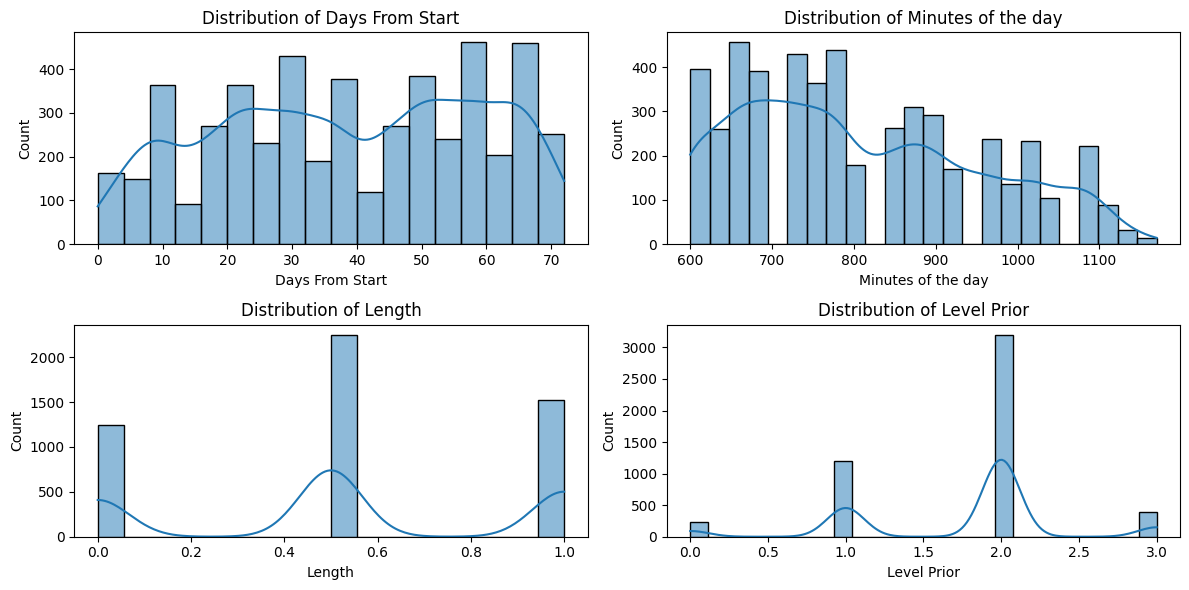


--- Categorical Counts ---


<ipython-input-60-b075264d5a4a>:83: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


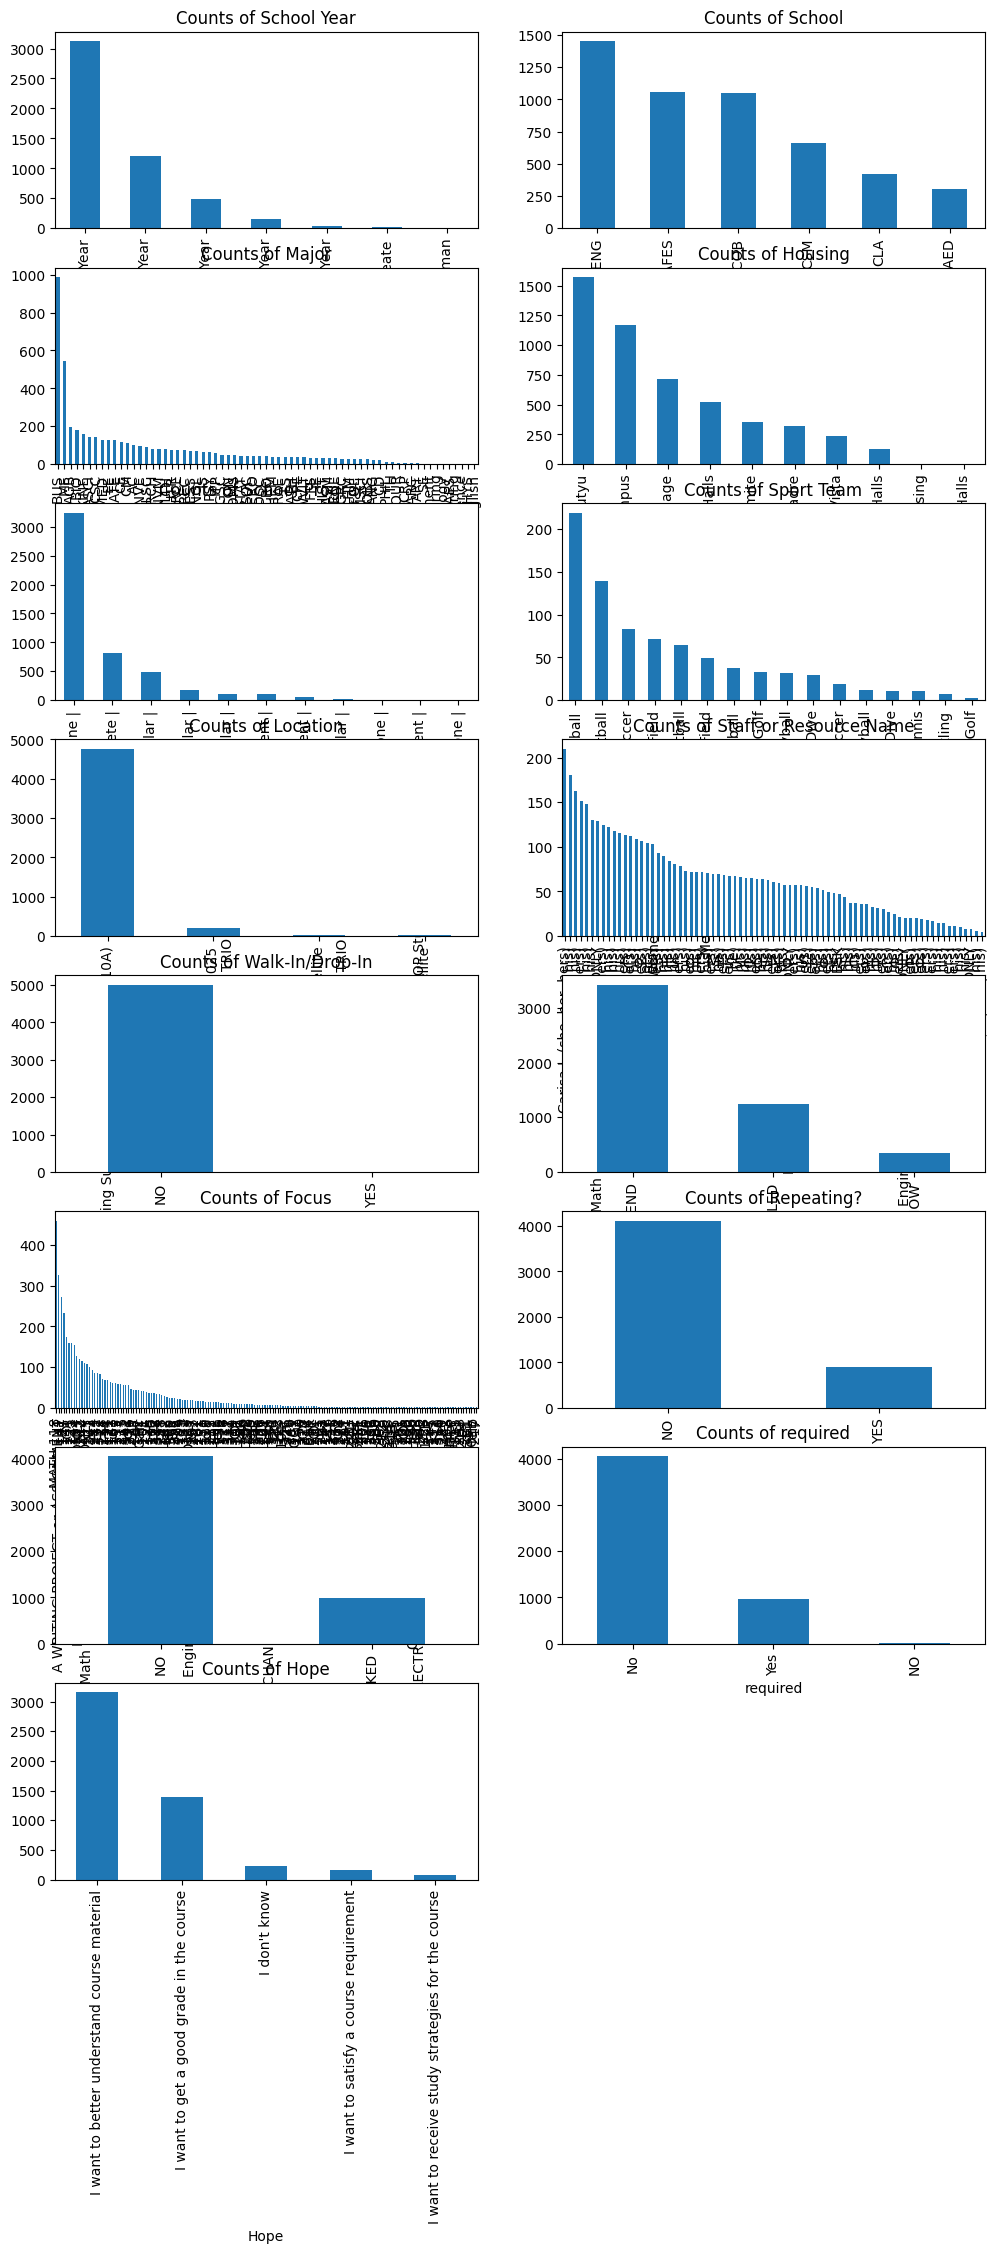


EDA Complete!


In [61]:
run_eda(end_of_quarter_trim)

**Initial EDA Results**  
1. Data Quality
   - Missing values are minimal:

   - Focus: 101 missing (2.0%)

   - School: 72 missing (1.4%)

2. Data Types  
   - 15 categorical (object) features

   - 3 numerical (int64) features

   - 1 float feature (Length)

3. Numerical Summary
   - Appointments span up to 72 days from the start of the quarter.

   - Appointments are mostly scheduled between 10:00 AM and 3:00 PM (Minutes of the day mean = 808).

   - Most sessions are 30 or 60 minutes, with a mean length of ~0.53 hours.

   - Level Prior (likely indicating prior academic level) ranges from 0 to 3.

4. Categorical Summary
   - School Year: Dominated by First-time First Year students (62.3%)

   - Majors: 67 unique majors, most common is BUS (988 records)

   - Housing: ~31% live in yakityutyu housing

   - Consultation Location: 95% take place at the Learning Support Center (Bldg26, Rm110A)

   - Staff: 77 unique staff members; Carisa J. is the most frequent

   - Cancellation Status: 3 categories, with 68% marked as “ATTEND”

5. Notable Patterns
   - Most students indicate they "want to better understand course material" as their reason for booking.

   - A majority of appointments are not repeating, not walk-ins, and not online consultations.

In [62]:
end_of_quarter_trim['Missed/No-Show/Canceled'].value_counts(normalize=True)

,proportion
Missed/No-Show/Canceled,
ATTEND,0.682271
CANCELED,0.248008
NOSHOW,0.069721


Target classes are imbalance

#### 3. Filling Nas

In [63]:
print(end_of_quarter_trim[end_of_quarter_trim['Focus'].isnull()])

                School Year School Major                        Housing  \
15              Fourth Year   CENG   CSC          I live in Cerro Vista   
16    First-time First Year   OCOB   BUS  I live in Poly Canyon Village   
17    First-time First Year   CENG    EE           I live in yakityutyu   
51              Fourth Year   CENG   CSC          I live in Cerro Vista   
52    First-time First Year   OCOB   BUS  I live in Poly Canyon Village   
...                     ...    ...   ...                            ...   
4872            Second Year  CAFES   AGB              I live off campus   
4873  First-time First Year   CENG  ENVE  I live in Poly Canyon Village   
4969             Third Year   OCOB   BUS  I live in Poly Canyon Village   
4970             Third Year   OCOB   BUS  I live in Poly Canyon Village   
5017            Fourth Year    CSM  MATH              I live off campus   

                              School Program          Sport Team  \
15                             

In [64]:
end_of_quarter_trim['Sport Team']= end_of_quarter_trim['Sport Team'].fillna('None')
end_of_quarter_trim['School']= end_of_quarter_trim['School'].fillna('Unknown')
end_of_quarter_trim['Focus']= end_of_quarter_trim['Focus'].fillna('Unknown')
end_of_quarter_clean = end_of_quarter_trim.copy()

#### 4. Modeling

In [65]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [66]:
X = end_of_quarter_clean.drop(columns=['Missed/No-Show/Canceled'])
y = end_of_quarter_clean['Missed/No-Show/Canceled']

In [67]:
num_cols = X.select_dtypes(include=np.number).columns
cat_cols = X.select_dtypes(exclude=np.number).columns

In [68]:
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [70]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score,
                             classification_report,
                             confusion_matrix,
                             recall_score,
                             precision_score,
                             f1_score, make_scorer,
                             ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


Best F1 Score: [0.7179669  0.73174442 0.71707549 0.67456383 0.69932681]
Mean F1 Score: 0.7081354930925616

Classification Report:
              precision    recall  f1-score   support

      ATTEND       0.92      0.97      0.95      1028
    CANCELED       1.00      1.00      1.00       373
      NOSHOW       0.38      0.16      0.23       105

    accuracy                           0.92      1506
   macro avg       0.77      0.71      0.72      1506
weighted avg       0.90      0.92      0.91      1506



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


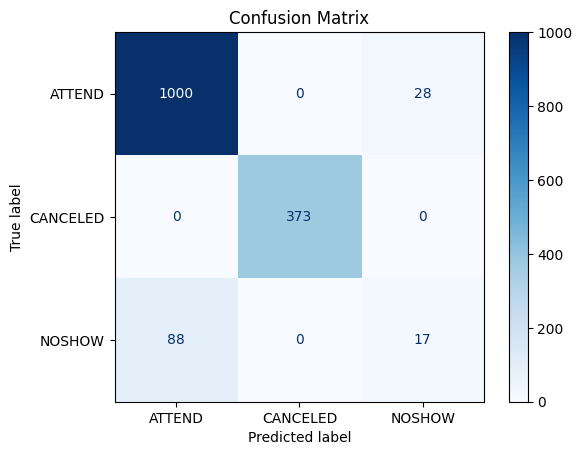

In [71]:
# Define the preprocessing transformer
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Build the pipeline with preprocessing, SMOTE, and classifier
pipeline_rf = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 5))
])

# Cross-validation
results = cross_validate(pipeline_rf,X_train, y_train,  cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
print("Best F1 Score:", results['test_score'])
print("Mean F1 Score:", results['test_score'].mean())

# Predict on test set
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

**Model Performance Summary**

This multi-class Random Forest classification model was developed to predict tutoring appointment outcomes: **ATTEND**, **CANCELED**, or **NOSHOW**. The model was trained using cross-validation and evaluated on a held-out test set.

**Cross-validation results** showed consistent performance across folds, with a **mean macro F1 score of 0.708**, indicating balanced effectiveness across the three classes during training.

On the **test set**, the model achieved:
- **Overall accuracy**: **92%**
- **Weighted F1 score**: **0.91**

The model performed **exceptionally well** in identifying both **ATTEND** and **CANCELED** appointments:
- **CANCELED**: Perfect precision and recall (**F1 = 1.00**)
- **ATTEND**: Very strong performance (**F1 = 0.95**)

However, the model struggled with the **NOSHOW** class:
- **Precision**: 0.38
- **Recall**: 0.16
- **F1 Score**: 0.23

This indicates that the model frequently **fails to detect no-shows**, likely due to **class imbalance** or overlapping patterns with ATTEND cases.

The **macro-average F1 score of 0.72** reflects this disparity, highlighting the need for further improvements targeting NOSHOW detection.


In [72]:
!pip install treeinterpreter

In [73]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# STEP 1: Fit the pipeline
pipeline_rf.fit(X_train, y_train)

# STEP 2: Clean unknown categories in X_test
X_test_fixed = X_test.copy()
for col in cat_cols:
    known = set(X_train[col].dropna().unique())
    X_test_fixed[col] = X_test_fixed[col].apply(lambda x: x if x in known else 'unknown')

# STEP 3: Transform X_test through the preprocessor
preprocessor = pipeline_rf.named_steps['preprocessor']
X_preprocessed = preprocessor.transform(X_test_fixed)

# STEP 4: Convert to dense float32
if hasattr(X_preprocessed, 'toarray'):
    X_preprocessed = X_preprocessed.toarray()
X_preprocessed = X_preprocessed.astype(np.float32)

# STEP 5: Get proper feature names
ohe = preprocessor.named_transformers_['cat']
encoded_cat_features = ohe.get_feature_names_out(cat_cols)
all_features = list(num_cols) + list(encoded_cat_features)

# STEP 6: Get trained RF model and explain with SHAP
rf_model = pipeline_rf.named_steps['classifier']
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_preprocessed)  # list of arrays, one per class

# STEP 7: Validate and plot
print(f"\nSHAP returned {len(shap_values)} classes. Each should match shape {X_preprocessed.shape}")

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(



SHAP returned 1506 classes. Each should match shape (1506, 351)



📊 SHAP Summary for Class: ATTEND


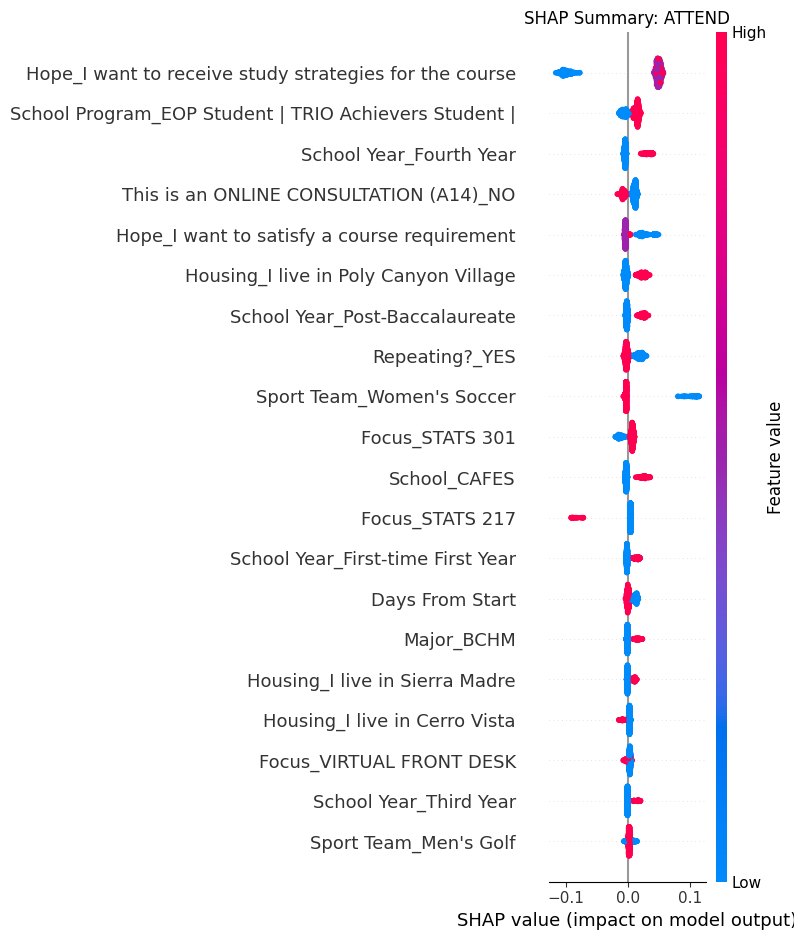


📊 SHAP Summary for Class: CANCELED


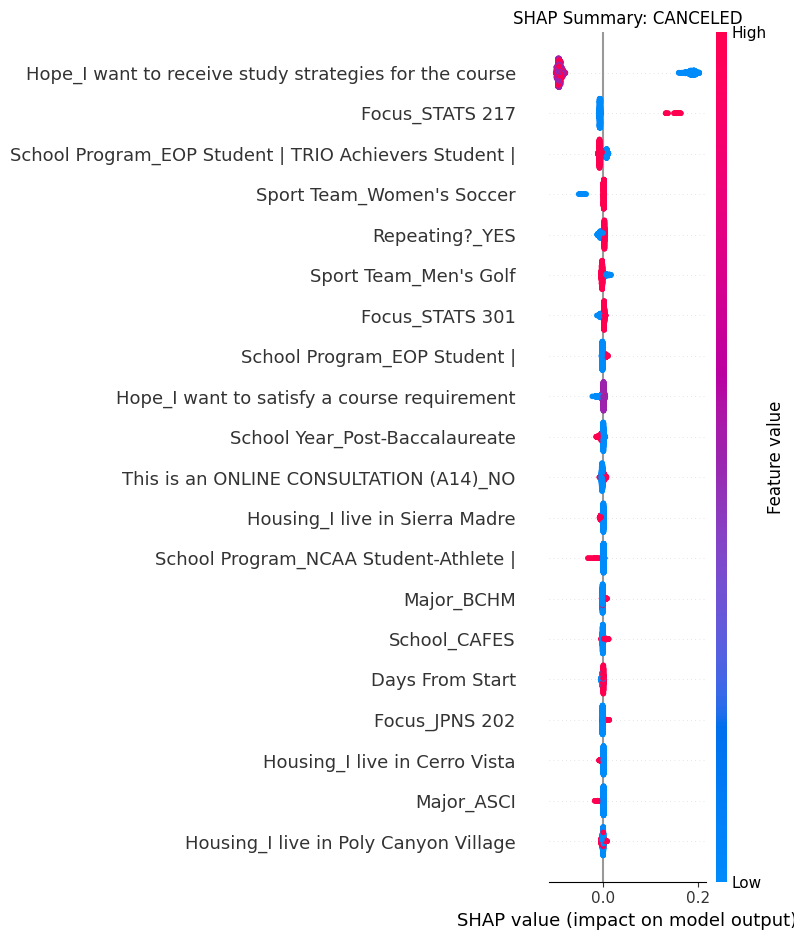


📊 SHAP Summary for Class: NOSHOW


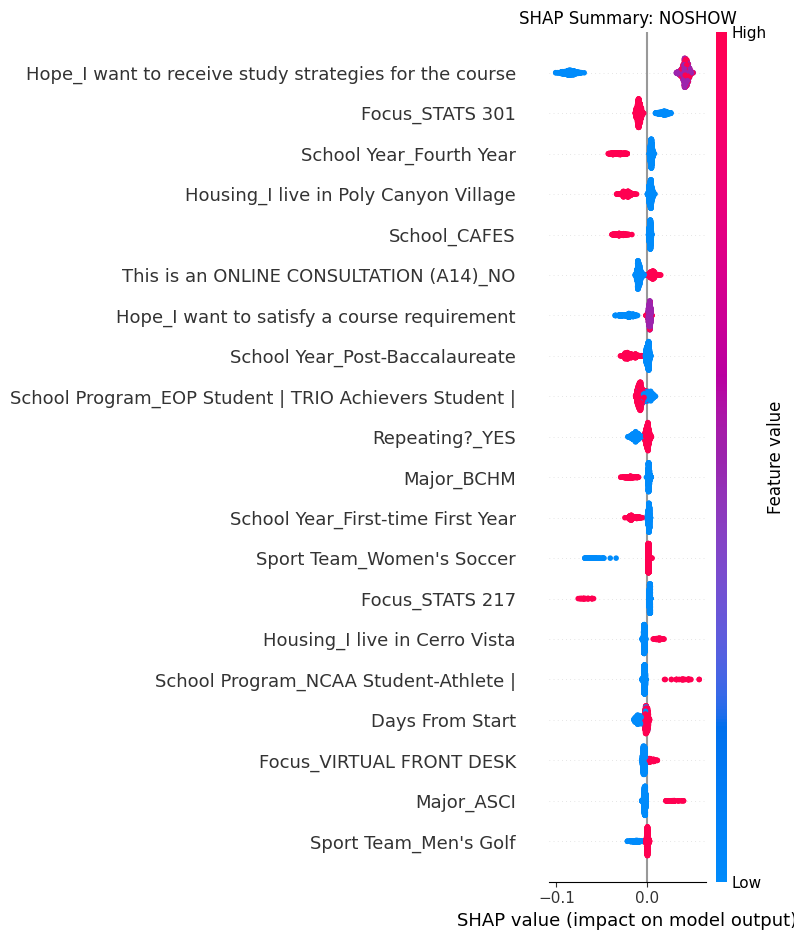

In [74]:
class_names = le.classes_  # ['CANCELED', 'NO', 'YES']

for i, class_name in enumerate(class_names):
    print(f"\n📊 SHAP Summary for Class: {class_name}")
    shap.summary_plot(shap_values[..., i], X_preprocessed, feature_names=all_features, show=False)
    plt.title(f"SHAP Summary: {class_name}")
    plt.tight_layout()
    plt.show()


In [75]:
import pandas as pd
import numpy as np

# shap_values has shape (n_samples, n_features, n_classes)
# all_features is your list of feature names
class_names = le.classes_  # e.g., ['CANCELED', 'NO', 'YES']

# Create a summary DataFrame for each class
summary_tables = {}

for class_idx, class_name in enumerate(class_names):
    class_shap = shap_values[..., class_idx]  # (n_samples, n_features)

    # Compute mean absolute SHAP value per feature
    mean_abs_shap = np.abs(class_shap).mean(axis=0)

    # Build a DataFrame
    summary_df = pd.DataFrame({
        'Feature': all_features,
        'Mean |SHAP|': mean_abs_shap
    }).sort_values(by='Mean |SHAP|', ascending=False).reset_index(drop=True)

    summary_tables[class_name] = summary_df

    # Display top 10 features for this class
    print(f"\n🔍 Top 10 SHAP Features for Class: {class_name}")
    display(summary_df.head(10))



🔍 Top 10 SHAP Features for Class: ATTEND


,Feature,Mean |SHAP|
0,Hope_I want to receive study strategies for th...,0.062267
1,School Program_EOP Student | TRIO Achievers St...,0.011328
2,School Year_Fourth Year,0.010046
3,This is an ONLINE CONSULTATION (A14)_NO,0.009997
4,Hope_I want to satisfy a course requirement,0.009991
5,Housing_I live in Poly Canyon Village,0.009585
6,School Year_Post-Baccalaureate,0.008605
7,Repeating?_YES,0.008513
8,Sport Team_Women's Soccer,0.008480
9,Focus_STATS 301,0.008011



🔍 Top 10 SHAP Features for Class: CANCELED


,Feature,Mean |SHAP|
0,Hope_I want to receive study strategies for th...,0.115327
1,Focus_STATS 217,0.009764
2,School Program_EOP Student | TRIO Achievers St...,0.006447
3,Sport Team_Women's Soccer,0.003704
4,Repeating?_YES,0.003425
5,Sport Team_Men's Golf,0.003144
6,Focus_STATS 301,0.002764
7,School Program_EOP Student |,0.002415
8,Hope_I want to satisfy a course requirement,0.002340
9,School Year_Post-Baccalaureate,0.002266



🔍 Top 10 SHAP Features for Class: NOSHOW


,Feature,Mean |SHAP|
0,Hope_I want to receive study strategies for th...,0.053060
1,Focus_STATS 301,0.010776
2,School Year_Fourth Year,0.009932
3,Housing_I live in Poly Canyon Village,0.009646
4,School_CAFES,0.009038
5,This is an ONLINE CONSULTATION (A14)_NO,0.008229
6,Hope_I want to satisfy a course requirement,0.007729
7,School Year_Post-Baccalaureate,0.006600
8,School Program_EOP Student | TRIO Achievers St...,0.006186
9,Repeating?_YES,0.005502
